This is the first set of models that were run using the group as the target available. It did not prove fruitful; I received scores as low as 0.08%. 

The notebook, for the time being, remains accessible for the curious. In case anyone wonders - why I didn't classify by group, well; here's their answer. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
#A summary of missing variables represented as a percentage of the total missing content. 
def null_summary(df, print_log=False, sort='ascending'):
    s = df.isnull().sum()*100/df.isnull().count()
    
    if sort.lower() == 'ascending':
        s = s.sort_values(ascending=True)
    elif sort.lower() == 'descending':
        s = s.sort_values(ascending=False)  
    if print_log: 
        print('Percentage of null values: \n', s)
  
    return pd.Series(s)

In [3]:
#get the data
talkdata = pd.read_csv('./data/talkdata.csv')
#Quick look at the head.
talkdata.head()

,timestamp,longitude,latitude,coordinates,is_active,phone_brand,device_model,category,gender,age,group
0,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,1 free,M,35,M32-38
1,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,Cozy 1,M,35,M32-38
2,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,Industry tag,M,35,M32-38
3,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,Property Industry 2.0,M,35,M32-38
4,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,music,M,35,M32-38


In [4]:
#The size and shape of this dataset before categorical changing.
talkdata.shape

(7832282, 11)

In [5]:
null_summary(talkdata)

timestamp       0.0
longitude       0.0
latitude        0.0
coordinates     0.0
is_active       0.0
phone_brand     0.0
device_model    0.0
category        0.0
gender          0.0
age             0.0
group           0.0
dtype: float64

This will be a classification project where in I predict the gender and age based on several categorical variables. The following feature engineering needs to be accomplished after importing the table and prior to modeling.

1. Derive the following columns from timestamp:

> Month

> DayofWeek

> Hour

2. Remove timestamp, tTime, epoch, longitude, latitude, phone_brand, gender, age
3. Set the target variable, y to the group column. Remove the target variable from the feature set. 
4. Perform a train_test split on the data. Ensure that the stratisfy parameter is set to group.
5. OneHotEncode all categorical variables.  

In [6]:
#Set the timestamp column to a datetime datatype.
talkdata['timestamp'] = pd.to_datetime(talkdata.timestamp)
talkdata.timestamp.dtype

dtype('<M8[ns]')

In [7]:
#create the categorical time columns
talkdata['hour'] = talkdata.timestamp.dt.hour
talkdata['weekday'] = talkdata.timestamp.dt.dayofweek
talkdata['week'] = talkdata.timestamp.dt.isocalendar().week

#concatenate the phone brand to the device model. 
talkdata['device_type'] = talkdata.phone_brand + " "+ talkdata.device_model
talkdata.describe(include='all', datetime_is_numeric=True)

,timestamp,longitude,latitude,coordinates,is_active,phone_brand,device_model,category,gender,age,group,hour,weekday,week,device_type
count,7832282,7.832282e+06,7.832282e+06,7832282,7.832282e+06,7832282,7832282,7832282,7832282,7.832282e+06,7832282,7.832282e+06,7.832282e+06,7.832282e+06,7832282
unique,NaN,NaN,NaN,32921,NaN,89,926,441,2,NaN,12,NaN,NaN,NaN,942
top,NaN,NaN,NaN,"(0.0, 0.0)",NaN,华为,荣耀6,Industry tag,M,NaN,M39+,NaN,NaN,NaN,华为 荣耀6
freq,NaN,NaN,NaN,2295988,NaN,2422726,354430,907153,5566437,NaN,1360719,NaN,NaN,NaN,354430
mean,2016-05-04 13:58:30.355242240,7.837463e+01,2.182485e+01,NaN,3.404700e-01,NaN,NaN,NaN,NaN,3.350478e+01,NaN,1.306016e+01,2.963128e+00,1.786502e+01,NaN
min,2016-04-30 23:52:24,-1.800000e+02,-3.380000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.100000e+01,NaN,0.000000e+00,0.000000e+00,1.700000e+01,NaN
25%,2016-05-02 20:22:46.500000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,2.700000e+01,NaN,8.000000e+00,1.000000e+00,1.800000e+01,NaN
50%,2016-05-04 14:05:48,1.127500e+02,2.857000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,3.100000e+01,NaN,1.300000e+01,3.000000e+00,1.800000e+01,NaN
75%,2016-05-06 08:22:22,1.171700e+02,3.401000e+01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,3.900000e+01,NaN,1.900000e+01,5.000000e+00,1.800000e+01,NaN
max,2016-05-08 00:00:08,1.511800e+02,5.364000e+01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,8.900000e+01,NaN,2.300000e+01,6.000000e+00,1.800000e+01,NaN


In [8]:
y = talkdata.group
#drop the non-categorical columnsand the columns that are no longer in use.
X = talkdata.drop(columns=['timestamp', 'longitude', 'latitude', 'phone_brand', 'device_model', 'age', 'gender', 'group'])
X.shape

(7832282, 7)

In [9]:
X.columns

Index(['coordinates', 'is_active', 'category', 'hour', 'weekday', 'week',
       'device_type'],
      dtype='object')

# Downsample the data 

In this portion of the process I'm going to downsample the data to a range of 250k. I will use these 250k records to determine if the data is configured correctly for constructing a model that will have at least 68% accuracy. If the model cannot be constructed within these guidelines, more wranging and processing may need to be done in order to get a working model. 

I will use a train-test split with the stratisfy parameter set for this portion of the data. I will check the balance on the pair.

In [10]:
X_train, X_model, y_train, y_model = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_model.shape

(783229, 7)

In [11]:
y_train.value_counts()

M39+      1224647
M32-38    1220489
M29-31     815500
M23-26     802553
M27-28     516055
F33-42     512257
F43+       437134
M22-       430549
F29-32     331361
F24-26     263928
F23-       255876
F27-28     238704
Name: group, dtype: int64

In [12]:
y_model.value_counts()

M39+      136072
M32-38    135610
M29-31     90611
M23-26     89173
M27-28     57339
F33-42     56917
F43+       48571
M22-       47839
F29-32     36818
F24-26     29325
F23-       28431
F27-28     26523
Name: group, dtype: int64

In [13]:
#Export the training data for later use.
X_train.to_csv('./data/train_features.csv', index=False)
y_train.to_csv('./data/train_target.csv', index=False)

#Export the model data for later use. 
X_model.to_csv('./data/model_features.csv', index=False)
y_model.to_csv('./data/model_target.csv', index=False)

# Model Selection

The data has been cleaned and prepared a bit more for model slection. The first cell is for reimporting the data in the rather frequent events that the PC locks up and I have to start from scratch. I can just start my selection process from this point - rather than rerun the entire notebook.

In [14]:
#if necessary import the model data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling Imports - GridSearch
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

#Models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# #Get the data:
X_model = pd.read_csv('./data/model_features.csv')
y_model = pd.read_csv('./data/model_target.csv')
#shape it up:
y_model = y_model.values.ravel()
print("Training Shapes:", X_model.shape, y_model.shape)

Training Shapes: (783229, 7) (783229,)


In [15]:
#Investigate the parameters for truncate_svd. I don't know about the number of iterations. 
enc = OneHotEncoder()
X_enc = enc.fit_transform(X_model)
tsvd = TruncatedSVD(n_components = 500) 
svd_search = tsvd.fit_transform(X_enc)

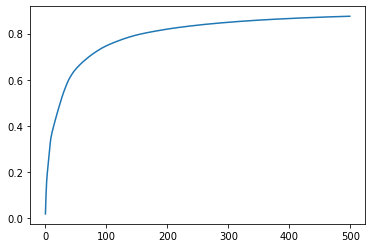

In [16]:
#Explained variance ratio on truncatedSVD. 
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.show()

In [33]:
evr = np.cumsum(tsvd.explained_variance_ratio_)
print(np.where((evr >= .70) & (evr <= .80))[0].mean())

115.5


# Searching for Models

In [40]:
# #Split for validation on 20% of the data. 
# X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42, stratify=y_model)
# print("Training Shapes:", X_train.shape, y_train.shape)
# print("Test Shapes: ",  X_test.shape, y_test.shape)

Training Shapes: (626583, 7) (626583,)
Test Shapes:  (156646, 7) (156646,)


In [42]:
#Split for validation on 20% of the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
print("Training Shapes:", X_train.shape, y_train.shape)
print("Test Shapes: ",  X_test.shape, y_test.shape)

Training Shapes: (3132912, 7) (3132912,)
Test Shapes:  (4699370, 7) (4699370,)


# Dummy
This dummy classifier was run multiple times with various parameters for the number of iterations and components with SVD. After a few tweaks and observations, I have found that 120 components and 5 iterations provide the best score. 

Unfortunately - even on a sample of over a million records; the scores from this classifier are too low to use predict the groups. I need to adjust my dataset and try again.

Fortunately, these groupings were based off a combination of the users' age and gender. Rather than trying to predict the groups. I will predict the gender. Then I will use a regression model to try and predict the ages.

In [43]:
#First run for model selection on 250k records. It takes less than a minute to fit on five estimators. 
pipeline = Pipeline([('enc', OneHotEncoder(handle_unknown='ignore')), 
                     ('svd', TruncatedSVD()),
                     ('dc', DummyClassifier(strategy='most_frequent'))])
params = { 'svd__n_components' :  [120, 12],
          }
#run with verbosity then clear output for readability. 
search = GridSearchCV(pipeline, params, cv=2, verbose=2)
search.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] svd__n_components=120 ...........................................
[CV] ............................ svd__n_components=120, total= 1.2min
[CV] svd__n_components=120 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ............................ svd__n_components=120, total= 1.2min
[CV] svd__n_components=12 ............................................
[CV] ............................. svd__n_components=12, total=  20.8s
[CV] svd__n_components=12 ............................................
[CV] ............................. svd__n_components=12, total=  19.4s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.1min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('enc',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('svd', TruncatedSVD()),
                                       ('dc',
                                        DummyClassifier(strategy='most_frequent'))]),
             param_grid={'svd__n_components': [120, 12]}, verbose=2)

In [45]:
print(f"best score: {search.best_score_} \n estimator: {search.best_estimator_}" )

best score: 0.17373197842773752 
 estimator: Pipeline(steps=[('enc', OneHotEncoder(handle_unknown='ignore')),
                ('svd', TruncatedSVD(n_components=120)),
                ('dc', DummyClassifier(strategy='most_frequent'))])


# Decision Tree

In [ ]:
#First run for model selection on 250k records. It takes less than a minute to fit on five estimators. 
pipeline = Pipeline([('enc', OneHotEncoder(handle_unknown='ignore')), 
                     ('svd', TruncatedSVD()),
                     ('dt', DecisionTreeClassifier())])
params = { 'svd__n_components' :  [100, 125, 300, 340],
          #'svd__n_iter' : [5, 8, 11], 
          'dt__max_depth': [100]   
          }

search = GridSearchCV(pipeline, params, cv=2, verbose=1)
search.fit(X_train, y_train)
print(f"best score: {search.best_score_} \n estimator: {search.best_estimator_}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


# Random Forest

In [ ]:
#First run for model selection on 250k records. It takes less than a minute to fit on five estimators. 
pipeline = Pipeline([('enc', OneHotEncoder(handle_unknown='ignore')), 
                     ('svd', TruncatedSVD()),
                     ('rf', RandomForestClassifier(random_state=1))])
params = { 'svd__n_components' :  [100, 125, 300, 340],
           'svd__n_iter' : [11, 25, 30],
           'rf__n_estimators' : [5],
           'rf__max_depth' : [200]
          }

search = GridSearchCV(pipeline, params, cv=2, verbose=1)
search.fit(X_train, y_train)
print(f"best score: {search.best_score_} \n estimator: {search.best_estimator_}")

# Carry Over Notes for Delivery Book

- On preprocessing.

> Select a few examples from the preprocessing module.
> Include a link to where the preprocessing was done, so they can review the whole process.

- On Exploratory Data Analysis 

> Select a few examles from the EDA notebook.

> Include a link to where the EDA was done. 

- On Feature Engineering.

> Include all information pertaining to the PCA(truncatedSVD), onehotencoding, and feature selection.

- On Sampling with stratify.

> Sort the category value counts by index.

> Display the value counts of training and test as a pie chart, side by side.


- On moving everything over

> Go ahead and import the files relevant to the location and run/display the analysis/computations off of those models. Import the data from the new model on each iteration.

> Include an explanation in the introduction that allows the reader to understand that the data is reimported in order to ensure that I can top and go from each section as needed (instead of having to rerun a notebook to get the correct format to be used.). 

- On Modeling

> Do not use verbosity. Instead include the link to the model selection notebook and explain that there is more than what meets the eye in the decision making. 

> Include the explained variance ratio



